导入jieba库
导入停用词及原始资料
对导入资料进行分词操作并从中选取词频数最高的20个词

In [3]:
import jieba
jieba.load_userdict("stopwords.txt")
stopwords = open("stopwords.txt" , "r" , encoding='utf-8').read().split('\n')
final ={}
word=[]
txt = open("words.txt" , "r" , encoding='utf-8').read()
words = jieba.lcut(txt)

for i in words:
    if (i not in stopwords and len(i)>1):
        word.append(i)
        final[i]= final.get(i,0) + 1
ans_1=sorted(final.items(), key=lambda x: x[1], reverse=True)[:20]        
ans_1

[('发展', 153),
 ('中国', 102),
 ('建设', 94),
 ('经济', 70),
 ('财政', 61),
 ('推进', 46),
 ('提出', 46),
 ('国家', 44),
 ('特色', 43),
 ('我国', 39),
 ('中国共产党', 39),
 ('现代化', 37),
 ('体系', 34),
 ('时代', 34),
 ('思想', 33),
 ('县域', 32),
 ('社会', 31),
 ('时期', 30),
 ('目标', 27),
 ('百年', 27)]

导入pypolt库
将x、y轴数据导入
用plot快速绘图
调整相关参数设置使图片清晰、大小合适

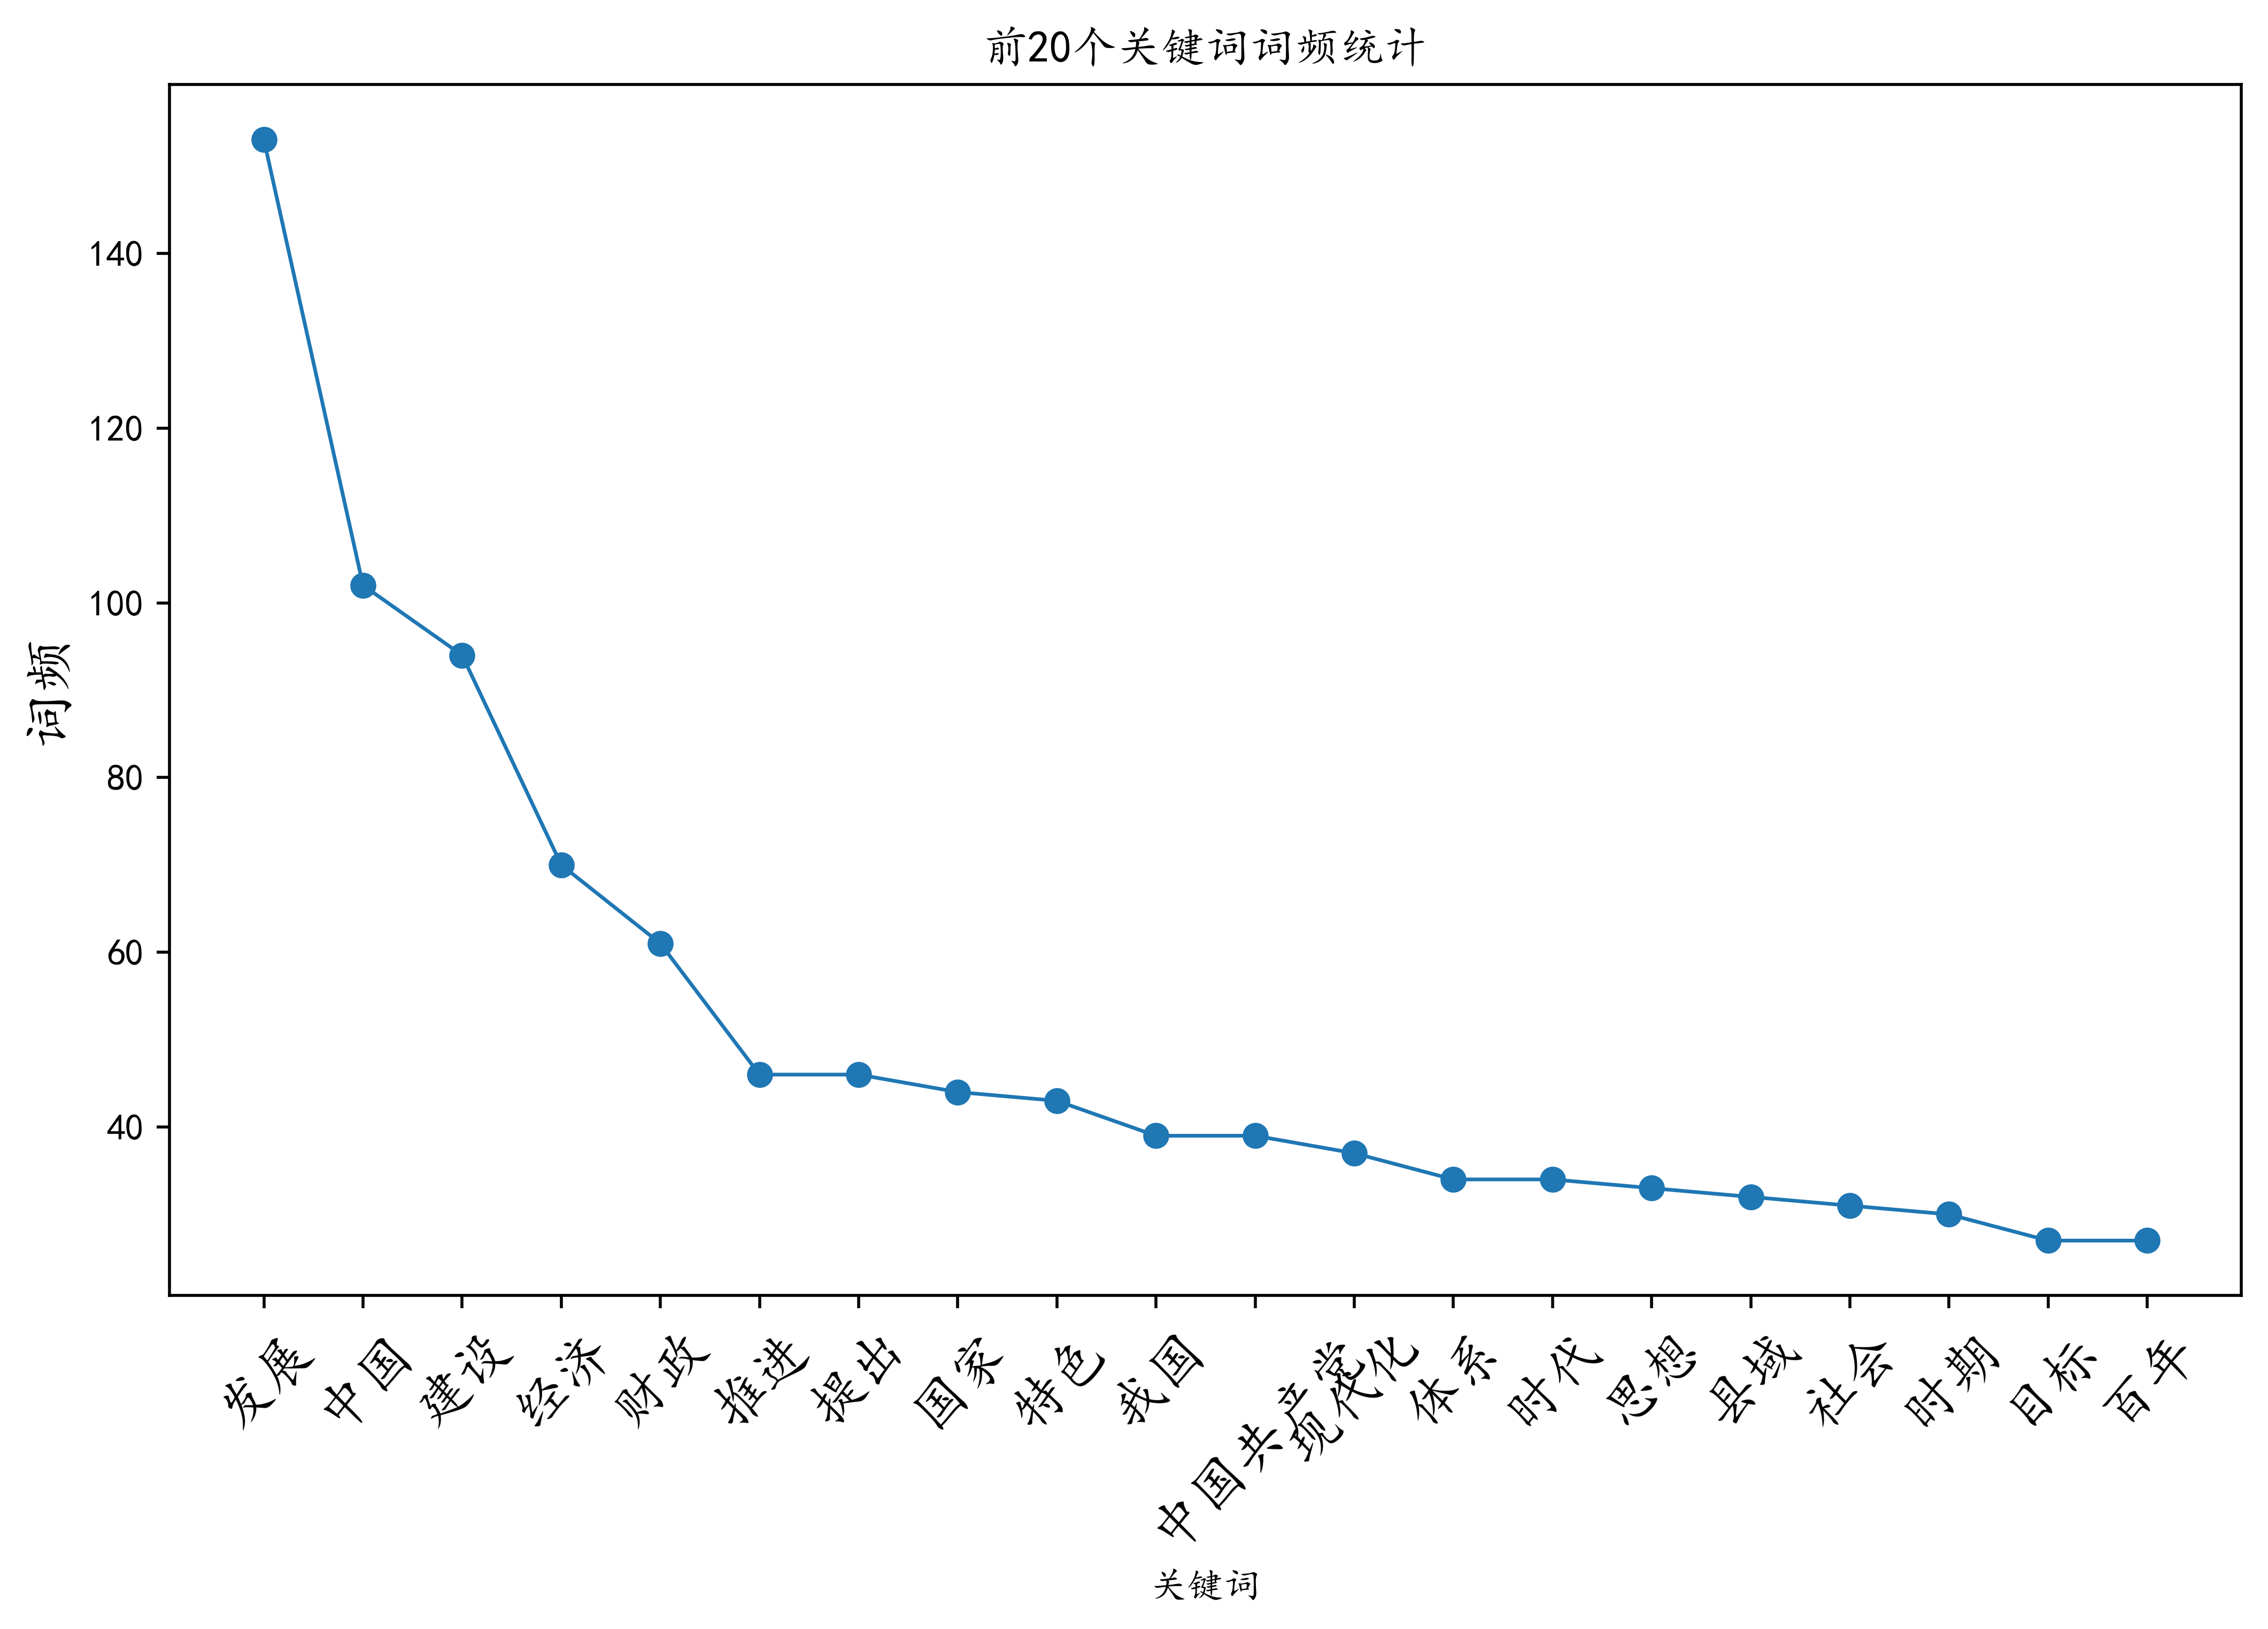

In [4]:
import matplotlib.pyplot as plt
X=[]
Y=[]
for i in ans_1:
    X.append(i[0])
    Y.append(i[1])
plt.rcParams['font.sans-serif']='KaiTi'    

plt.figure(num=0,figsize=(10,6),dpi=500)
plt.xlabel('关键词')
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('词频',fontsize=15)
plt.title('前20个关键词词频统计')

plt.plot(X,Y,linewidth =1,marker='o')
plt.show()


导入random库
从words中获得随机词word
判断word是否存在词库final中
判读word是否重复
若不重复则取出相关数据进行绘图

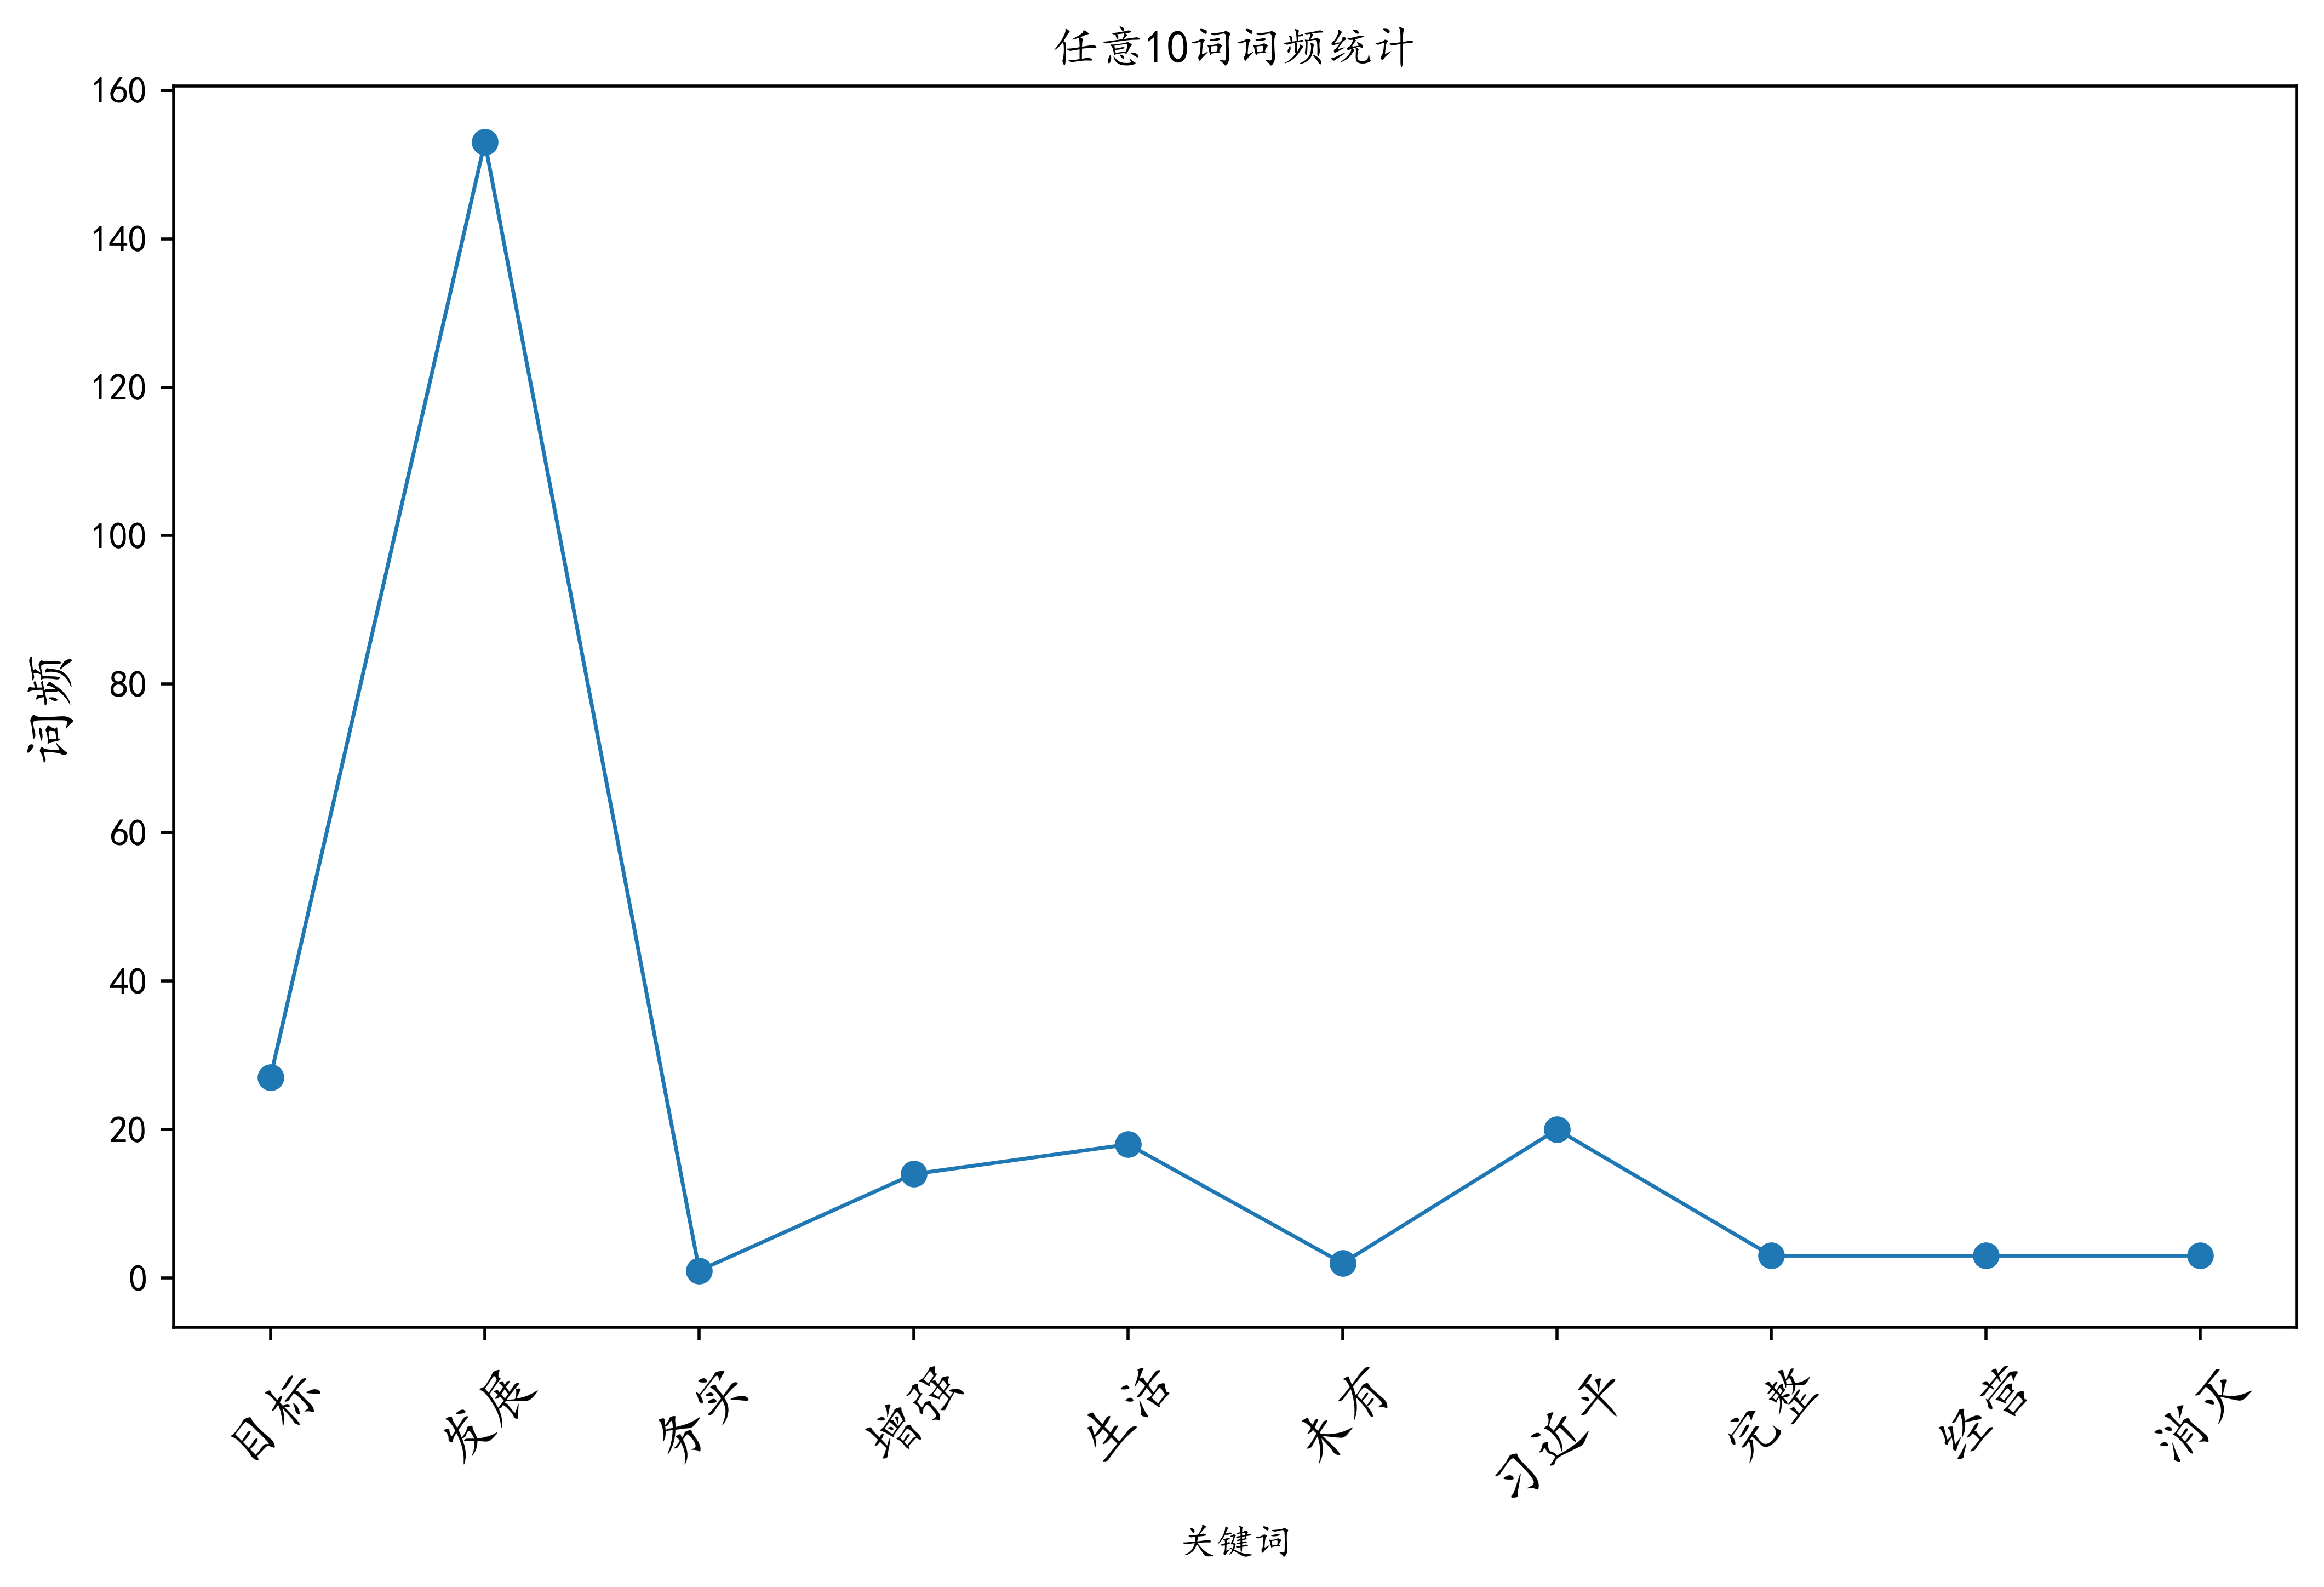

In [5]:
import random
X=[]
Y=[]
i=0
while i <10:
    r=random.randint(0,len(word)-1)
    if word[r] not in X:
        X.append(word[r])
        Y.append(final[word[r]])
        i+=1
    
plt.rcParams['font.sans-serif']='KaiTi'    

plt.figure(num=0,figsize=(10,6),dpi=500)
plt.xlabel('关键词')
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('词频',fontsize=15)
plt.title('任意10词词频统计')

plt.plot(X,Y,linewidth =1,marker='o')
plt.show()

导入wordcloud库
导入词云外形图片
将关键词转化为字符串格式并生存词云
保存词云

In [48]:
from wordcloud import WordCloud 
from imageio import imread 
mask = imread('duckduck.jpg')
wordsum=' '.join(word)
wordcloud = WordCloud(max_words=100,mask=mask,font_path='simhei.ttf').generate(wordsum)
wordcloud.to_file('wordduck.jpg')
image=wordcloud.to_image().show()